# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [92]:
!pip install imbalanced-learn

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-
To: /content/Bus_Breakdown_and_Delays.csv
100% 34.4M/34.4M [00:00<00:00, 191MB/s]


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [5]:
df= pd.read_csv('/content/drive/MyDrive/week5/Bus_Breakdown_and_Delays.csv')

## Importing Libraries

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [ ]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [ ]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [ ]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


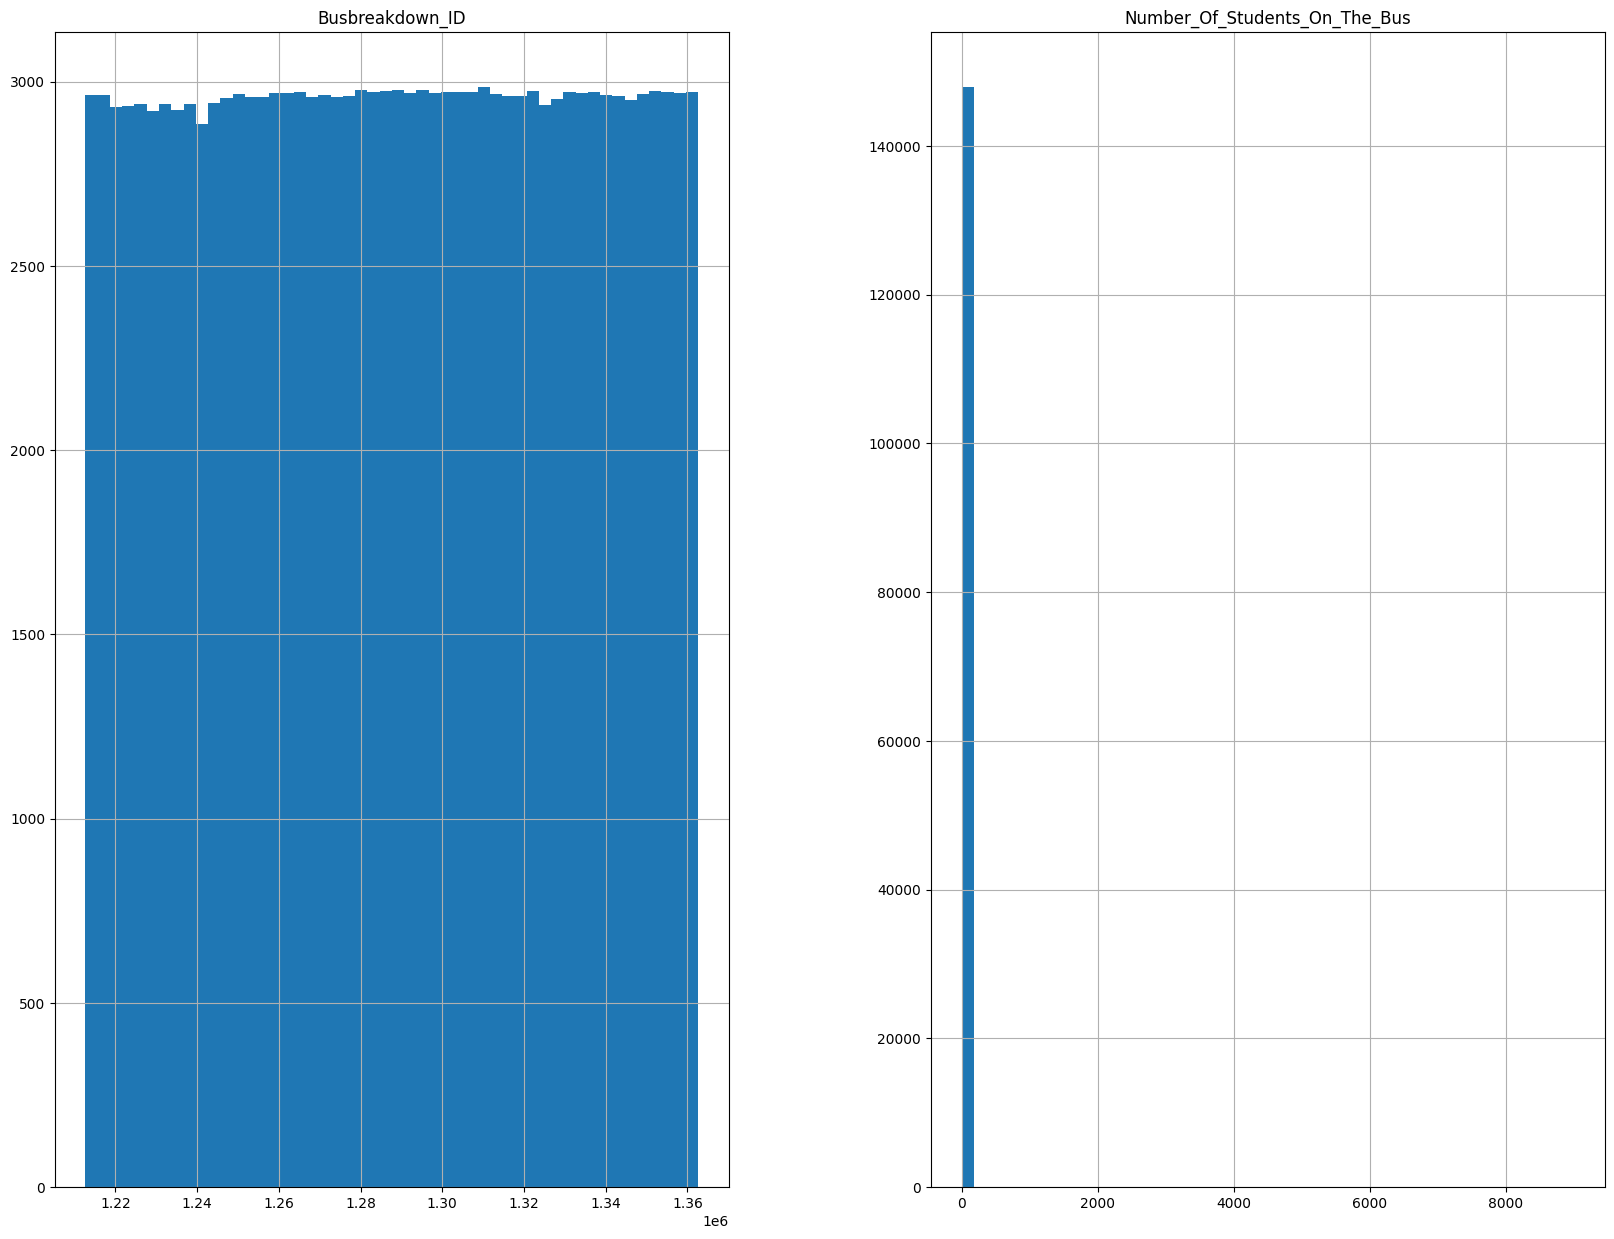

In [6]:
hist = df.hist(bins=50, figsize=(20,15))

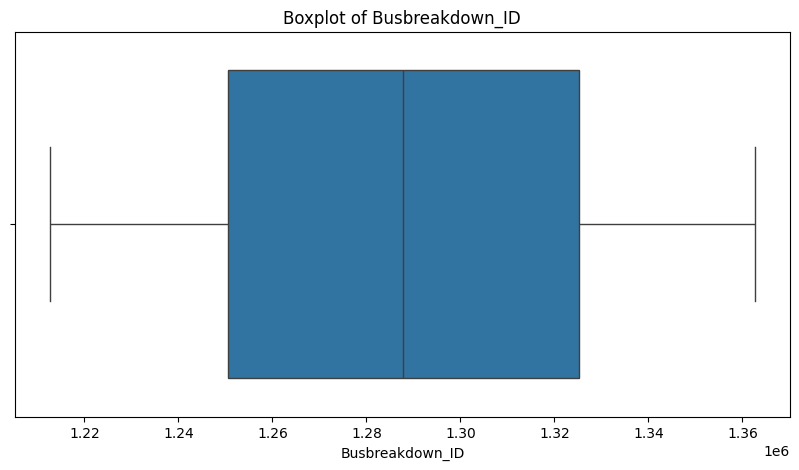

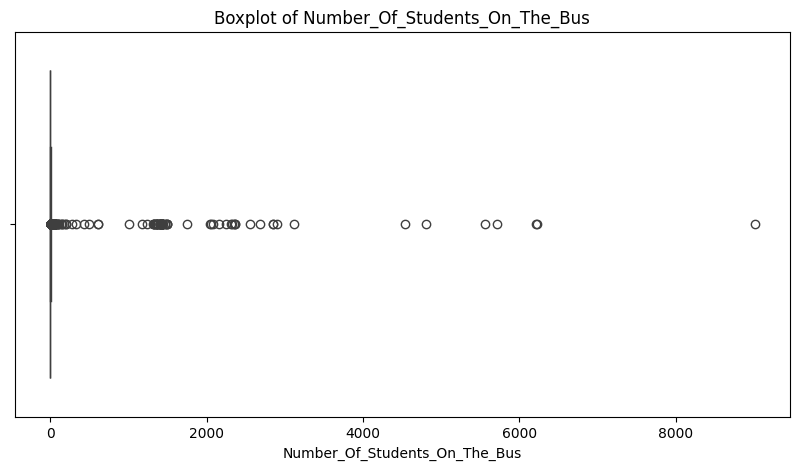

In [8]:
for column in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [ ]:
print(df.isnull().sum())

School_Year                             0
Busbreakdown_ID                         0
Run_Type                               89
Bus_No                                  0
Route_Number                           88
Reason                                102
Schools_Serviced                        0
Occurred_On                             0
Created_On                              0
Boro                                 6318
Bus_Company_Name                        0
How_Long_Delayed                    21630
Number_Of_Students_On_The_Bus           0
Has_Contractor_Notified_Schools         0
Has_Contractor_Notified_Parents         0
Have_You_Alerted_OPT                    0
Informed_On                             0
Incident_Number                    142340
Last_Updated_On                         0
Breakdown_or_Running_Late               0
School_Age_or_PreK                      0
dtype: int64


In [21]:
#Handle Missing Values
for column in df.select_dtypes(include=np.number).columns:
    df[column].fillna(df[column].mean(), inplace=True)


df['Boro'].fillna(df['Boro'].mode()[0], inplace=True)
df['Incident_Number'].fillna(df['Incident_Number'].mode()[0], inplace=True)
df['Run_Type'].fillna(df['Run_Type'].mode()[0], inplace=True)
df['Route_Number'].fillna(df['Route_Number'].mode()[0], inplace=True)
df['Reason'].fillna(df['Reason'].mode()[0], inplace=True)


df['How_Long_Delayed'] = pd.to_numeric(df['How_Long_Delayed'], errors='coerce')
df['How_Long_Delayed'].fillna(df['How_Long_Delayed'].mean(), inplace=True)

df['Number_Of_Students_On_The_Bus'].fillna(df['Number_Of_Students_On_The_Bus'].mean(), inplace=True)

In [15]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,0
Bus_No,0
Route_Number,0
Reason,0
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,0


In [24]:
#Encode Categorical Variables

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
encoder = OneHotEncoder(sparse=False)
label_encoder = LabelEncoder()
df['Run_Type'] = label_encoder.fit_transform(df['Run_Type'])
df['Reason'] = label_encoder.fit_transform(df['Reason'])
df['Boro'] = label_encoder.fit_transform(df['Boro'])
df['School_Age_or_PreK'] = label_encoder.fit_transform(df['School_Age_or_PreK'])
print(encoder)


OneHotEncoder(sparse=False)


In [23]:

label_encoder = LabelEncoder()
df['Breakdown_or_Running_Late'] = label_encoder.fit_transform(df['Breakdown_or_Running_Late'])
label_encoder

LabelEncoder()

In [28]:
#Scale and Normalize Data
from sklearn.preprocessing import StandardScaler , MinMaxScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.select_dtypes(include=np.number))
scaled_df = pd.DataFrame(scaled_data, columns=df.select_dtypes(include=np.number).columns)
df[df.select_dtypes(include=np.number).columns] = scaler.fit_transform(df[df.select_dtypes(include=np.number).columns])
print(df.head())

  School_Year  Busbreakdown_ID  Run_Type Bus_No Route_Number    Reason  \
0   2015-2016        -1.454052 -0.972636    811            1  1.029587   
1   2015-2016        -1.449496 -0.972636   9302            1 -0.579161   
2   2015-2016        -1.664513 -0.972636    358            2 -0.579161   
3   2015-2016        -1.671196 -0.972636    331            2  1.029587   
4   2015-2016        -1.663865 -0.972636    332            2  1.029587   

  Schools_Serviced             Occurred_On              Created_On     Boro  \
0             C353  10/26/2015 08:30:00 AM  10/26/2015 08:40:00 AM -0.90777   
1             C814  10/27/2015 07:10:00 AM  10/27/2015 07:11:00 AM -0.90777   
2             C195  09/18/2015 07:36:00 AM  09/18/2015 07:38:00 AM -0.90777   
3             C178  09/17/2015 08:08:00 AM  09/17/2015 08:12:00 AM -0.90777   
4             S176  09/18/2015 07:39:00 AM  09/18/2015 07:45:00 AM -0.90777   

   ... How_Long_Delayed  Number_Of_Students_On_The_Bus  \
0  ...     1.596923e-1

In [29]:
from re import M
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.select_dtypes(include=np.number))
scaled_df = pd.DataFrame(scaled_data, columns=df.select_dtypes(include=np.number).columns)
df[df.select_dtypes(include=np.number).columns] = scaled_df
print(df.head())



  School_Year  Busbreakdown_ID  Run_Type Bus_No Route_Number    Reason  \
0   2015-2016         0.081508  0.333333    811            1  0.666667   
1   2015-2016         0.082822  0.333333   9302            1  0.333333   
2   2015-2016         0.020804  0.333333    358            2  0.333333   
3   2015-2016         0.018876  0.333333    331            2  0.666667   
4   2015-2016         0.020991  0.333333    332            2  0.666667   

  Schools_Serviced             Occurred_On              Created_On  Boro  ...  \
0             C353  10/26/2015 08:30:00 AM  10/26/2015 08:40:00 AM   0.1  ...   
1             C814  10/27/2015 07:10:00 AM  10/27/2015 07:11:00 AM   0.1  ...   
2             C195  09/18/2015 07:36:00 AM  09/18/2015 07:38:00 AM   0.1  ...   
3             C178  09/17/2015 08:08:00 AM  09/17/2015 08:12:00 AM   0.1  ...   
4             S176  09/18/2015 07:39:00 AM  09/18/2015 07:45:00 AM   0.1  ...   

  How_Long_Delayed  Number_Of_Students_On_The_Bus  \
0         0.000

In [38]:
df.columns

Index(['School_Year', 'Busbreakdown_ID', 'Run_Type', 'Bus_No', 'Route_Number',
       'Reason', 'Schools_Serviced', 'Occurred_On', 'Created_On', 'Boro',
       'Bus_Company_Name', 'How_Long_Delayed', 'Number_Of_Students_On_The_Bus',
       'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
       'Have_You_Alerted_OPT', 'Informed_On', 'Incident_Number',
       'Last_Updated_On', 'Breakdown_or_Running_Late', 'School_Age_or_PreK'],
      dtype='object')

In [91]:
#Feature Engineering

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
X_trget = df['Breakdown_or_Running_Late']
X_features = df.drop(columns=['Breakdown_or_Running_Late'])
non_numeric_columns = X_features.select_dtypes(exclude=['number']).columns
label_encoder = LabelEncoder()

for column in non_numeric_columns:
    X_features[column] = label_encoder.fit_transform(X_features[column])


X_train, X_test, y_train, y_test = train_test_split(X_features, X_trget, test_size=0.2, random_state=42)

In [58]:
#OUT



numeric_columns = df.select_dtypes(include=['number']).columns
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)).any(axis=1)
df = df[~outliers]

In [81]:
print('data ferm outliers' , df_no_outliers)

data ferm outliers         School_Year  Busbreakdown_ID  Run_Type  Bus_No Route_Number    Reason  \
0               NaN              NaN       NaN     811            1       NaN   
1               NaN              NaN       NaN    9302            1       NaN   
2               NaN              NaN       NaN     358            2       NaN   
3               NaN              NaN       NaN     331            2       NaN   
4               NaN              NaN       NaN     332            2       NaN   
...             ...              ...       ...     ...          ...       ...   
147967          NaN              NaN       NaN    9345            2       NaN   
147968          NaN              NaN       NaN    0001            5       NaN   
147969       2016.0         0.936228  1.000000  GC0112         X928  0.333333   
147970          NaN              NaN       NaN   5525D         Q920       NaN   
147971       2016.0         0.936241  0.666667    2530         K617  0.666667   

       S

In [60]:
df.duplicated().sum() # no dupilcated

0

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [62]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [63]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [64]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
2960/2960 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7961 - loss: 1034.1262 - val_accuracy: 0.8860 - val_loss: 0.3670
Epoch 2/10
2960/2960 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8821 - loss: 0.5110 - val_accuracy: 0.8860 - val_loss: 0.3549
Epoch 3/10
2960/2960 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.8827 - loss: 0.3771 - val_accuracy: 0.8860 - val_loss: 0.3547
Epoch 4/10
2960/2960 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8844 - loss: 0.3608 - val_accuracy: 0.8860 - val_loss: 0.3547
Epoch 5/10
2960/2960 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8836 - loss: 0.3886 - val_accuracy: 0.8860 - val_loss: 0.3548
Epoch 6/10
2960/2960 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8837 - loss: 0.3597 - val_accuracy: 0.8860 - val_loss: 0.3547
Epoch 7/10
2960/2960 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8809 - loss: 0.3653 - val_accuracy: 0.8860 - val_loss: 0.3547
Epoch 8/10
2960/2960 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8844 - loss: 

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [65]:
model.evaluate(X_test, y_test)

925/925 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8859 - loss: 0.3551


[0.35276806354522705, 0.8870755434036255]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [66]:
Predictions = model.predict(X_test)

925/925 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [68]:
Predictions = np.round(Predictions)
print(Predictions)

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [69]:
Predictions_classes = np.argmax(Predictions, axis=1)
print(Predictions_classes)



[0 0 0 ... 0 0 0]


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

In [78]:
from sklearn.metrics import accuracy_score

print(y_test.dtype)


if y_test.dtype == float:
    y_test_binary = (y_test > 0.5).astype(int)
else:
    y_test_binary = y_test


accuracy = accuracy_score(y_test_binary, Predictions_classes)
print(accuracy)

float64
0.11292448048656868


## Save the Model
Save the trained model for submission.

In [79]:
model.save('my_model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here: